<a href="https://www.kaggle.com/code/roninnapoletano/ucispambase?scriptVersionId=141371295" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import time

import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_validate
from sklearn.metrics import make_scorer, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, auc, roc_curve, confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold, RandomizedSearchCV

from xgboost import XGBClassifier

from imblearn.over_sampling import SMOTE

from tabulate import tabulate


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# **Jeu de données**

Ce jeu est tiré de UC Irvine Machine Learning Repository (https://archive.ics.uci.edu/dataset/94/spambase)

# **Contexte**
Dans le contexte actuel de communication, les e-mails jouent un rôle essentiel dans les échanges professionnels et personnels. Malheureusement, les e-mails de spam représentent une menace.

C'est dans ce contexte que le projet de détection d'e-mails de spam ou non-spam prend  son sens. L'objectif est de développer un système de détection efficace qui peut automatiquement identifier et filtrer les e-mails de spam, tout en minimisant les faux positifs.



In [2]:
dataset = pd.read_csv("/kaggle/input/spambase/spambase_csv.csv")

dataset_copie = dataset.copy(deep=True)
target = 'spam'
labels = ['Ham','Spam']
features = [i for i in dataset.columns.values if i not in [target]]


# 1 :**Exploration des données**

Exploration du jeu de données
* Quels sont les types de données que nous avons ?
* Certaines données sont-elles manquantes ?
* Quelle est la répartition des données ?



In [3]:
dataset.columns

Index(['word_freq_make', 'word_freq_address', 'word_freq_all', 'word_freq_3d',
       'word_freq_our', 'word_freq_over', 'word_freq_remove',
       'word_freq_internet', 'word_freq_order', 'word_freq_mail',
       'word_freq_receive', 'word_freq_will', 'word_freq_people',
       'word_freq_report', 'word_freq_addresses', 'word_freq_free',
       'word_freq_business', 'word_freq_email', 'word_freq_you',
       'word_freq_credit', 'word_freq_your', 'word_freq_font', 'word_freq_000',
       'word_freq_money', 'word_freq_hp', 'word_freq_hpl', 'word_freq_george',
       'word_freq_650', 'word_freq_lab', 'word_freq_labs', 'word_freq_telnet',
       'word_freq_857', 'word_freq_data', 'word_freq_415', 'word_freq_85',
       'word_freq_technology', 'word_freq_1999', 'word_freq_parts',
       'word_freq_pm', 'word_freq_direct', 'word_freq_cs', 'word_freq_meeting',
       'word_freq_original', 'word_freq_project', 'word_freq_re',
       'word_freq_edu', 'word_freq_table', 'word_freq_conference',


In [4]:
dataset.head(n=10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,0.00,0.223,0.0,0.000,0.000,0.000,3.000,15,54,1
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,0.00,0.054,0.0,0.164,0.054,0.000,1.671,4,112,1
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,0.00,0.206,0.0,0.000,0.000,0.000,2.450,11,49,1
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,0.00,0.271,0.0,0.181,0.203,0.022,9.744,445,1257,1
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,0.04,0.030,0.0,0.244,0.081,0.000,1.729,43,749,1


In [5]:
print(f'Dans ce jeu de données nous avons {dataset.shape[0]} lignes et {dataset.shape[1]} colonnes')
print(f'Avons-nous des données manquantes ? {dataset.isna().any()}')

Dans ce jeu de données nous avons 4601 lignes et 58 colonnes
Avons-nous des données manquantes ? word_freq_make                False
word_freq_address             False
word_freq_all                 False
word_freq_3d                  False
word_freq_our                 False
word_freq_over                False
word_freq_remove              False
word_freq_internet            False
word_freq_order               False
word_freq_mail                False
word_freq_receive             False
word_freq_will                False
word_freq_people              False
word_freq_report              False
word_freq_addresses           False
word_freq_free                False
word_freq_business            False
word_freq_email               False
word_freq_you                 False
word_freq_credit              False
word_freq_your                False
word_freq_font                False
word_freq_000                 False
word_freq_money               False
word_freq_hp                  False
wor

In [6]:
print(f'Nos types de données')
dataset.info ()

Nos types de données
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_re

In [7]:
dataset.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,...,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,...,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,...,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.065000,0.000000,0.000000,0.000000,0.000000,2.276000,15.000000,95.000000,0.000000
75%,0.000000,0.000000,0.420000,0.000000,0.380000,0.000000,0.000000,0.000000,0.000000,0.160000,...,0.000000,0.188000,0.000000,0.315000,0.052000,0.000000,3.706000,43.000000,266.000000,1.000000
max,4.540000,14.280000,5.100000,42.810000,10.000000,5.880000,7.270000,11.110000,5.260000,18.180000,...,4.385000,9.752000,4.081000,32.478000,6.003000,19.829000,1102.500000,9989.000000,15841.000000,1.000000


In [8]:
dataset.sample(n = 10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_%3B,char_freq_%28,char_freq_%5B,char_freq_%21,char_freq_%24,char_freq_%23,capital_run_length_average,capital_run_length_longest,capital_run_length_total,class
1765,0.00,0.00,0.00,0.0,0.67,0.00,2.01,0.00,0.00,0.00,...,0.0,0.000,0.0,0.305,0.000,0.000,2.162,14,93,1
209,0.22,0.22,0.22,0.0,1.77,0.22,0.44,0.44,0.22,2.88,...,0.0,0.000,0.0,0.563,0.150,0.000,86.650,1038,1733,1
839,0.31,0.00,0.63,0.0,0.47,0.47,0.15,0.79,0.15,0.63,...,0.0,0.076,0.0,1.300,0.127,0.000,5.241,97,650,1
3518,0.00,0.00,0.00,0.0,0.24,0.49,0.00,0.00,0.00,0.49,...,0.0,0.054,0.0,0.000,0.027,0.000,4.634,157,380,0
1059,0.00,0.00,0.00,0.0,0.00,0.00,0.45,0.00,0.00,0.45,...,0.0,0.000,0.0,0.037,0.150,1.584,13.936,114,1324,1
3631,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.000,0.000,0.000,1.000,1,5,0
1786,0.86,0.00,0.86,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.928,0.154,0.154,2.409,7,53,1
214,0.00,0.00,0.00,0.0,2.50,0.00,0.00,0.00,0.00,0.00,...,0.0,0.000,0.0,0.080,0.000,0.000,2.111,18,57,1
1471,0.00,0.82,0.32,0.0,1.14,0.32,0.00,0.16,0.00,0.65,...,0.0,0.000,0.0,0.000,0.290,0.029,2.257,13,158,1
1494,0.76,0.38,0.00,0.0,0.38,0.38,0.00,0.00,0.00,0.38,...,0.0,0.124,0.0,0.124,0.000,0.062,89.900,735,899,1


In [9]:
dataset.nunique().sort_values()

class                            2
word_freq_table                 38
word_freq_3d                    43
word_freq_parts                 53
word_freq_font                  99
word_freq_conference           106
word_freq_857                  106
word_freq_cs                   108
word_freq_415                  110
word_freq_receive              113
word_freq_addresses            118
word_freq_direct               125
word_freq_telnet               128
word_freq_report               133
word_freq_original             136
word_freq_over                 141
word_freq_make                 142
word_freq_money                143
word_freq_order                144
word_freq_credit               148
word_freq_lab                  156
word_freq_people               158
word_freq_technology           159
word_freq_project              160
word_freq_pm                   163
word_freq_000                  164
word_freq_internet             170
word_freq_address              171
word_freq_remove    

In [10]:
nu = dataset[features].nunique().sort_values()
nf = []; cf = []; nnf = 0; ncf = 0; 

for i in range(dataset[features].shape[1]):
    if nu.values[i]<=7:cf.append(nu.index[i])
    else: nf.append(nu.index[i])

print('\n\033[1mInference:\033[0m Le Datset a {} valeurs numériques & {} categorical features.'.format(len(nf),len(cf)))


Inference: Le Datset a 57 valeurs numériques & 1 categorical features.


# **2. Distrubution et relations entre les données**

Text(0.5, 1.0, 'Diagramme en Boîte de word_freq_your pour les courriels de spam et non spam')

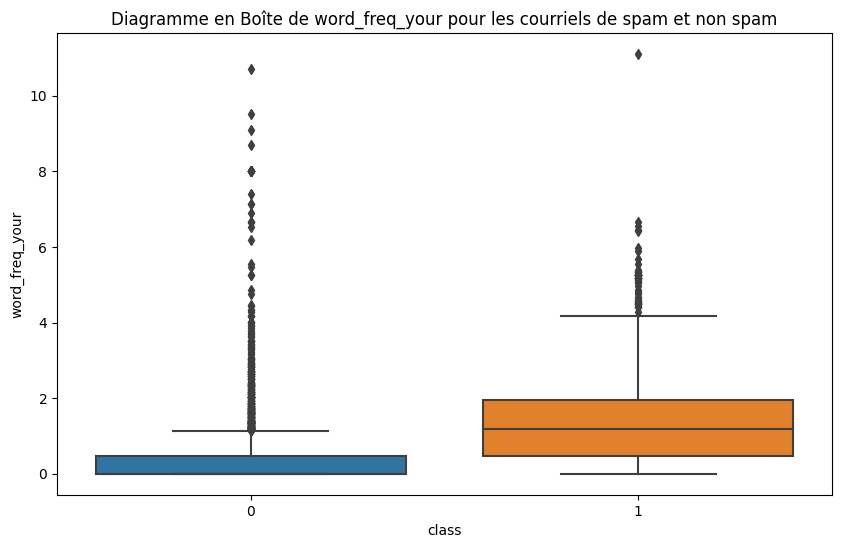

In [11]:
# Création du diagramme en boîte
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['class'], y=dataset['word_freq_your'], data=dataset)

# Ajout de titres et d'étiquettes
plt.title('Diagramme en Boîte de word_freq_your pour les courriels de spam et non spam')

Text(0.5, 1.0, 'Diagramme en Boîte de word_freq_your pour les courriels de spam et non spam')

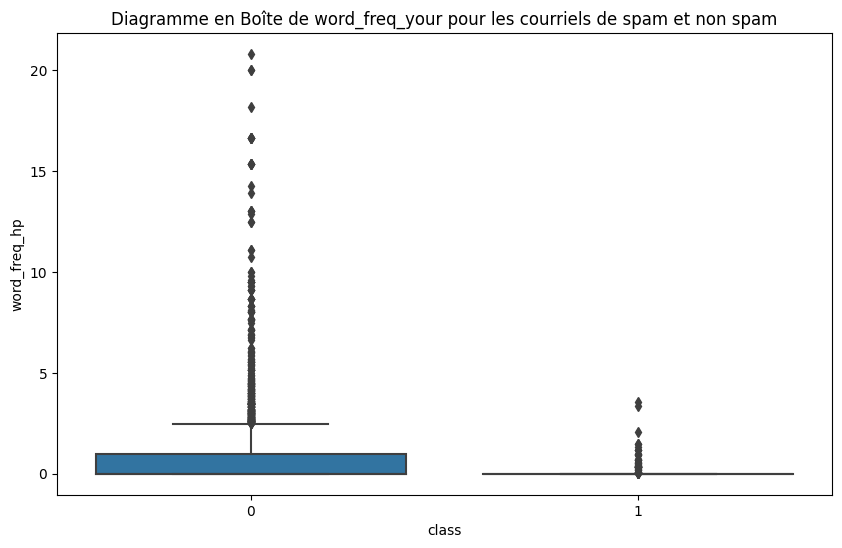

In [12]:
# Création du diagramme en boîte
plt.figure(figsize=(10, 6))
sns.boxplot(x=dataset['class'], y=dataset['word_freq_hp'], data=dataset)

# Ajout de titres et d'étiquettes
plt.title('Diagramme en Boîte de word_freq_your pour les courriels de spam et non spam')

         Distribution des Spam et Non-Spam         


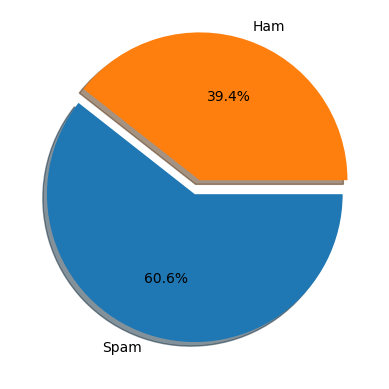

In [13]:

MAP={}
for e, i in enumerate(dataset['class'].unique()):
    MAP[i]=labels[e]
    
dataset1 = dataset.copy()
dataset1[target]=dataset1['class'].map(MAP)

explode=np.zeros(len(labels))
explode[-1]=0.1
print('\033[1mDistribution des Spam et Non-Spam'.center(55))
plt.pie(dataset1[target].value_counts(), labels=dataset1[target].value_counts().index, counterclock=False, shadow=True, 
        explode=explode, autopct='%1.1f%%', radius=1, startangle=0)
plt.show()

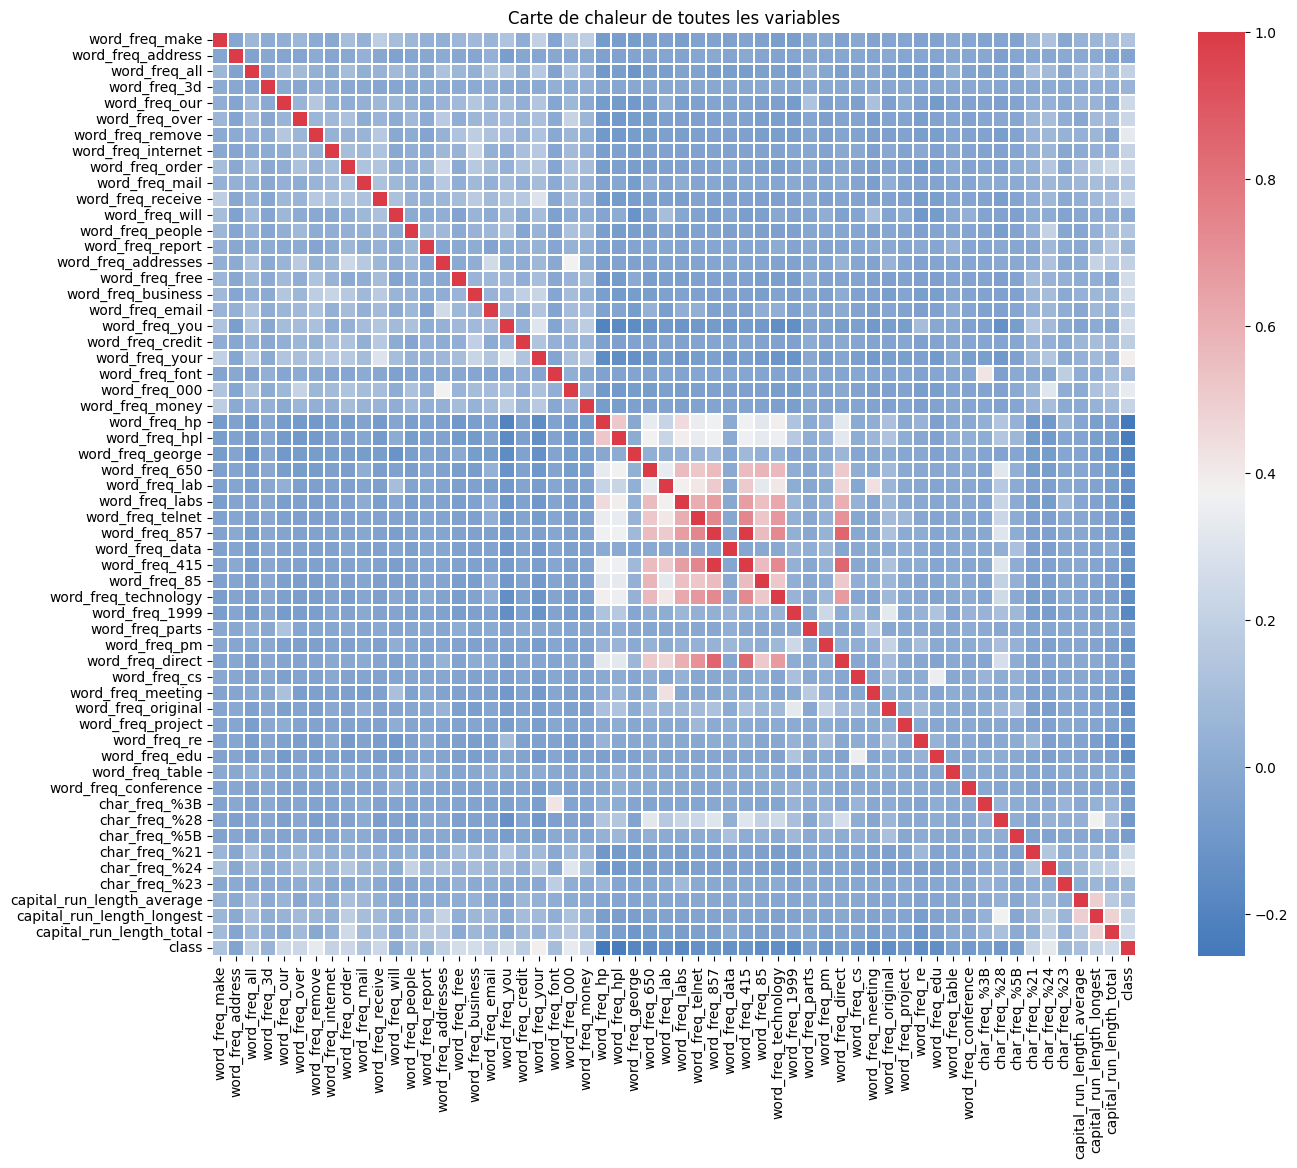

In [14]:
corr=dataset.corr()
plt.figure(figsize=(16, 12))
ax=sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap=sns.diverging_palette(250, 10, as_cmap=True),
            square=True,
            linewidths=.1)
ax.set(title="Carte de chaleur de toutes les variables");



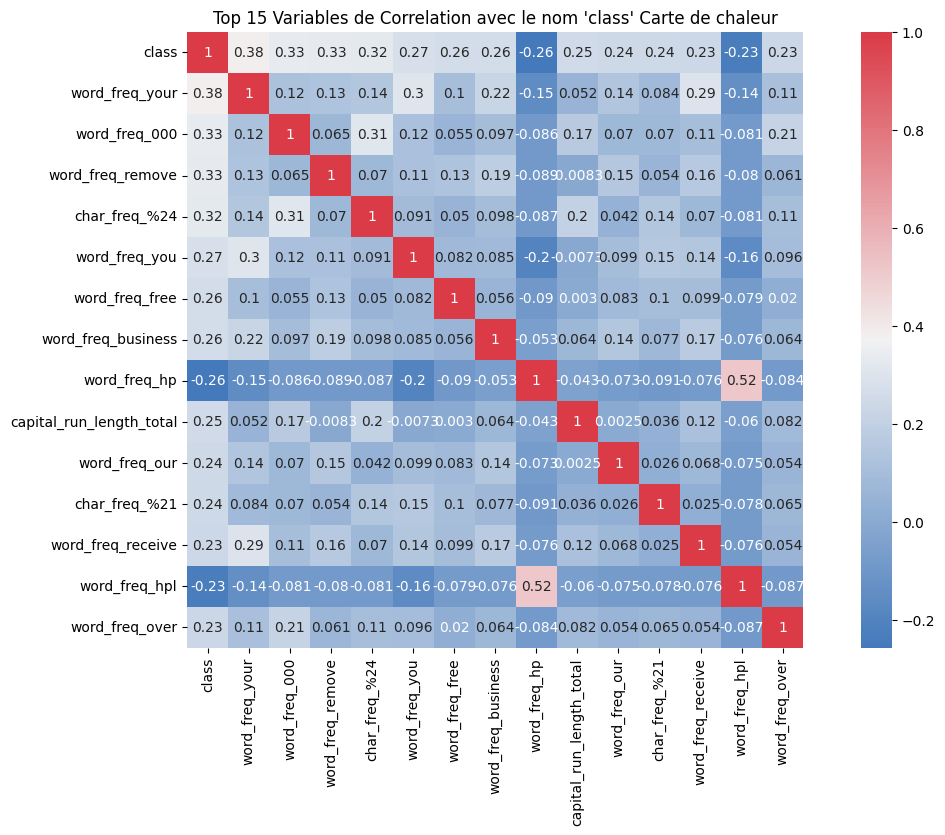

In [15]:
k = 15 # Nombre de variables les plus corrélées à considérer

# Sélection des colonnes les plus corrélées avec la variable "class"
cols = corr.abs().nlargest(k, 'class')['class'].index

# Calcul de la matrice de corrélation pour les colonnes sélectionnées
cm = np.corrcoef(dataset[cols].values.T)

# Création du graphique de corrélation
plt.figure(figsize=(15, 8))
ax = sns.heatmap(cm, yticklabels=cols.values, xticklabels=cols.values,
                 cmap=sns.diverging_palette(250, 10, as_cmap=True),
                 annot=True, square=True)
ax.set(title=f"Top {k} Variables de Correlation avec le nom 'class' Carte de chaleur")
plt.show()

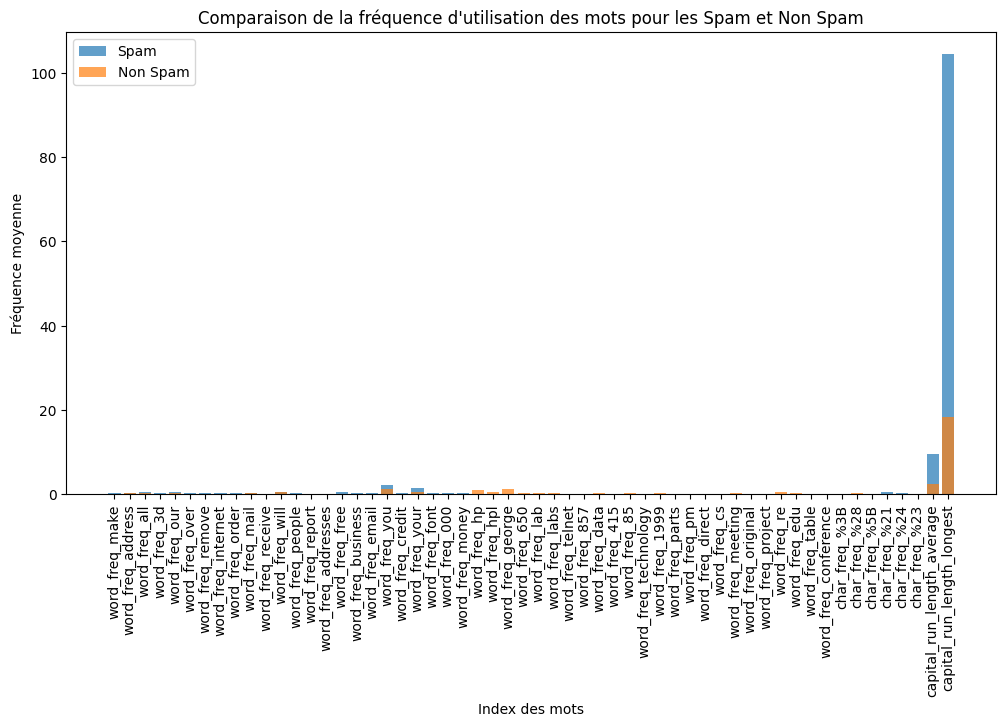

In [16]:
spam_data = dataset[dataset['class'] == 1]  # Colonne 57 indiquant la classe (1 pour spam)
non_spam_data = dataset[dataset['class'] == 0]  # Colonne 57 indiquant la classe (0 pour non spam)

# Calculer la fréquence moyenne des mots pour les e-mails spam et non spam
spam_word_frequency = spam_data.iloc[:, :56].mean(axis=0)
non_spam_word_frequency = non_spam_data.iloc[:, :56].mean(axis=0)

column_names = dataset.columns[:56] 

# Plot des histogrammes pour la fréquence d'utilisation des mots
plt.figure(figsize=(12, 6))
plt.bar(range(len(spam_word_frequency)), spam_word_frequency, alpha=0.7, label='Spam')
plt.bar(range(len(non_spam_word_frequency)), non_spam_word_frequency, alpha=0.7, label='Non Spam')
plt.xlabel("Index des mots")
plt.ylabel("Fréquence moyenne")
plt.title("Comparaison de la fréquence d'utilisation des mots pour les Spam et Non Spam")
plt.xticks(range(len(column_names)), column_names, rotation='vertical') 
plt.legend()
plt.show()

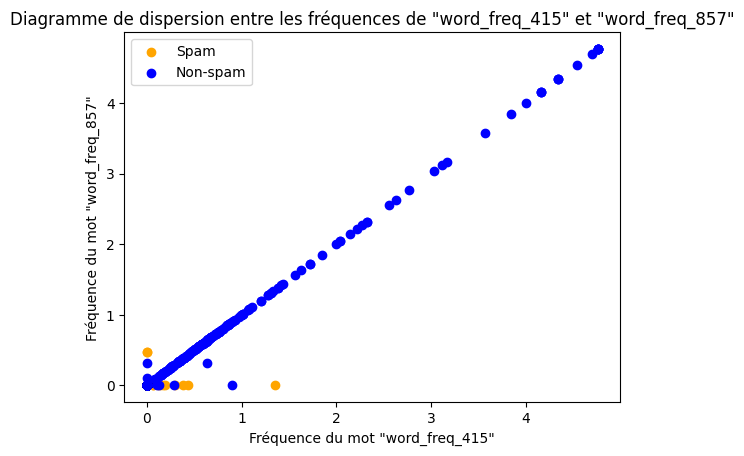

In [17]:

# Diagramme de dispersion 
plt.scatter(spam_data['word_freq_415'], spam_data['word_freq_857'], color='orange', label='Spam')
plt.scatter(non_spam_data['word_freq_415'], non_spam_data['word_freq_857'], color='blue', label='Non-spam')


plt.xlabel('Fréquence du mot "word_freq_415"')
plt.ylabel('Fréquence du mot "word_freq_857"')
plt.title('Diagramme de dispersion entre les fréquences de "word_freq_415" et "word_freq_857"')
plt.legend()

plt.show()

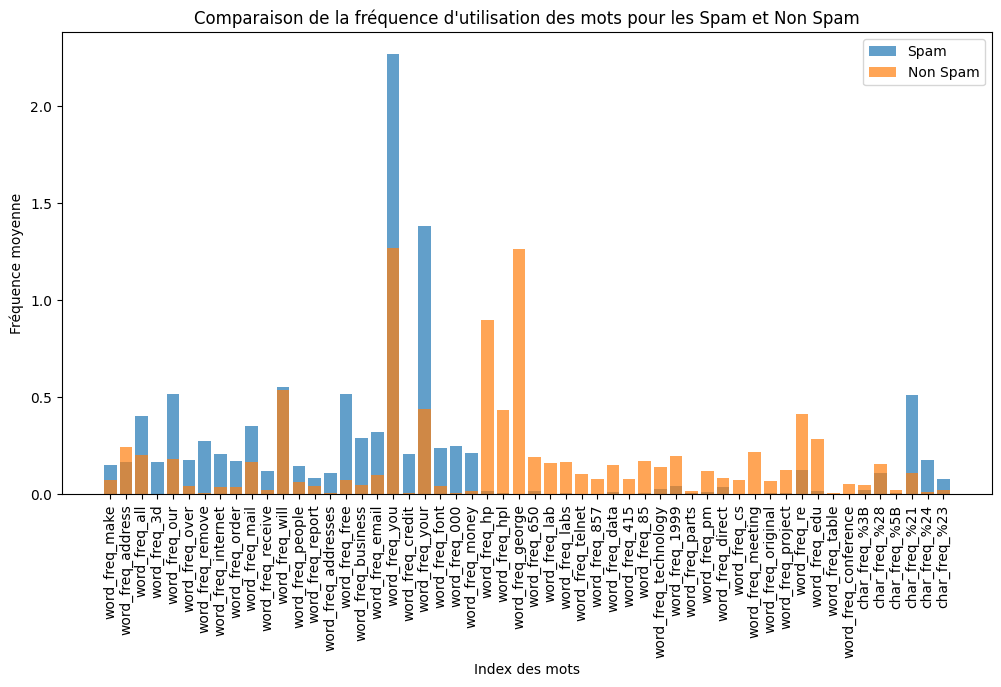

In [18]:

# Calculer la fréquence moyenne des mots pour les e-mails spam et non spam
spam_word_frequency = spam_data.iloc[:, :54].mean(axis=0)
non_spam_word_frequency = non_spam_data.iloc[:, :54].mean(axis=0)

column_names = dataset.columns[:54] 

# Plot des histogrammes pour la fréquence d'utilisation des mots
plt.figure(figsize=(12, 6))
plt.bar(range(len(spam_word_frequency)), spam_word_frequency, alpha=0.7, label='Spam')
plt.bar(range(len(non_spam_word_frequency)), non_spam_word_frequency, alpha=0.7, label='Non Spam')
plt.xlabel("Index des mots")
plt.ylabel("Fréquence moyenne")
plt.title("Comparaison de la fréquence d'utilisation des mots pour les Spam et Non Spam")
plt.xticks(range(len(column_names)), column_names, rotation='vertical') 
plt.legend()
plt.show()

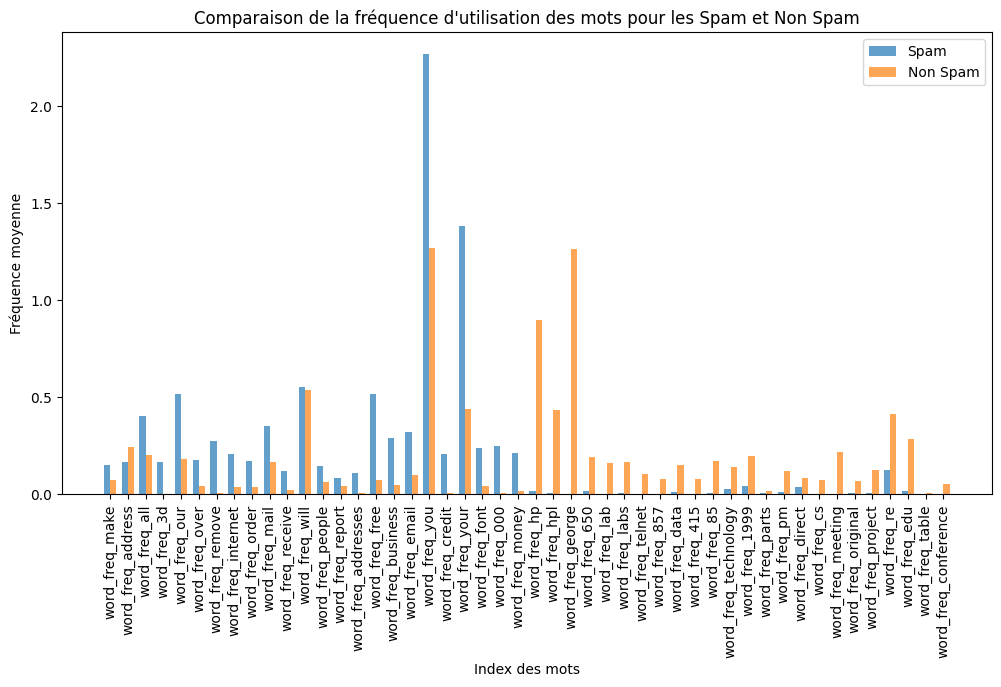

In [19]:
spam_data = dataset[dataset['class'] == 1]  
non_spam_data = dataset[dataset['class'] == 0]  

# Calculer la fréquence moyenne des mots pour les e-mails spam et non spam
spam_word_frequency = spam_data.iloc[:, :48].mean(axis=0)
non_spam_word_frequency = non_spam_data.iloc[:, :48].mean(axis=0)

column_names = dataset.columns[:48] 

# Paramètres de la taille du graphique
fig, ax = plt.subplots(figsize=(12, 6))  
bar_width = 0.35
positions = np.arange(len(column_names))

ax.bar(positions - bar_width/2, spam_word_frequency, bar_width, alpha=0.7, label='Spam')
ax.bar(positions + bar_width/2, non_spam_word_frequency, bar_width, alpha=0.7, label='Non Spam')
ax.set_xlabel("Index des mots")
ax.set_ylabel("Fréquence moyenne")
ax.set_title("Comparaison de la fréquence d'utilisation des mots pour les Spam et Non Spam")
ax.set_xticks(positions)
ax.set_xticklabels(column_names, rotation='vertical')
ax.legend()

plt.show()

In [20]:
pivot_class_freq=pd.pivot_table(dataset,values=dataset.drop(["class","capital_run_length_average","capital_run_length_longest","capital_run_length_total"],axis=1),index='class',aggfunc="mean")
pivot_class_freq

,char_freq_%21,char_freq_%23,char_freq_%24,char_freq_%28,char_freq_%3B,char_freq_%5B,word_freq_000,word_freq_1999,word_freq_3d,word_freq_415,...,word_freq_re,word_freq_receive,word_freq_remove,word_freq_report,word_freq_table,word_freq_technology,word_freq_telnet,word_freq_will,word_freq_you,word_freq_your
class,,,,,,,,,,,,,,,,,,,,,
0,0.109984,0.021713,0.011648,0.158578,0.050281,0.022684,0.007088,0.197744,0.000886,0.077787,...,0.415760,0.021711,0.009383,0.042403,0.008192,0.141671,0.106033,0.536324,1.270341,0.438702
1,0.513713,0.078877,0.174478,0.108970,0.020573,0.008199,0.247055,0.043469,0.164672,0.001776,...,0.125091,0.118434,0.275405,0.083574,0.001219,0.029515,0.001274,0.549972,2.264539,1.380370


# **3. Ingénierie des caractéristiques (Feature engineering)**

3.1 Crossing
* Est-ce utile de combiner des variables ?
* Cela peut-il nous ouvrir d'autres possiblités ?
* Cela peut-il améliorer la performance du modèle ?
* Des nouvelles corrélations peuvent apparaitre ?


In [21]:

dataset['combined_415_857_log'] = np.log(dataset['word_freq_415'] + 1) * np.log(dataset['word_freq_857'] + 1)
dataset['combined_415_857'] = dataset['word_freq_415'] + dataset['word_freq_857']

dataset['combined_hp_hpl_log'] = np.log(dataset['word_freq_hp'] + 1) * np.log(dataset['word_freq_hpl'] + 1)
dataset['combined_hp_hpl'] = dataset['word_freq_hp'] + dataset['word_freq_hpl']

dataset['combined_direct_415_log'] = np.log(dataset['word_freq_direct'] + 1) * np.log(dataset['word_freq_415'] + 1)
dataset['combined_direct_415'] = dataset['word_freq_direct'] + dataset['word_freq_415']

dataset['combined_direct_857_log'] = np.log(dataset['word_freq_direct'] + 1) * np.log(dataset['word_freq_857'] + 1)
dataset['combined_direct_857'] = dataset['word_freq_direct'] + dataset['word_freq_857']


In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 66 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

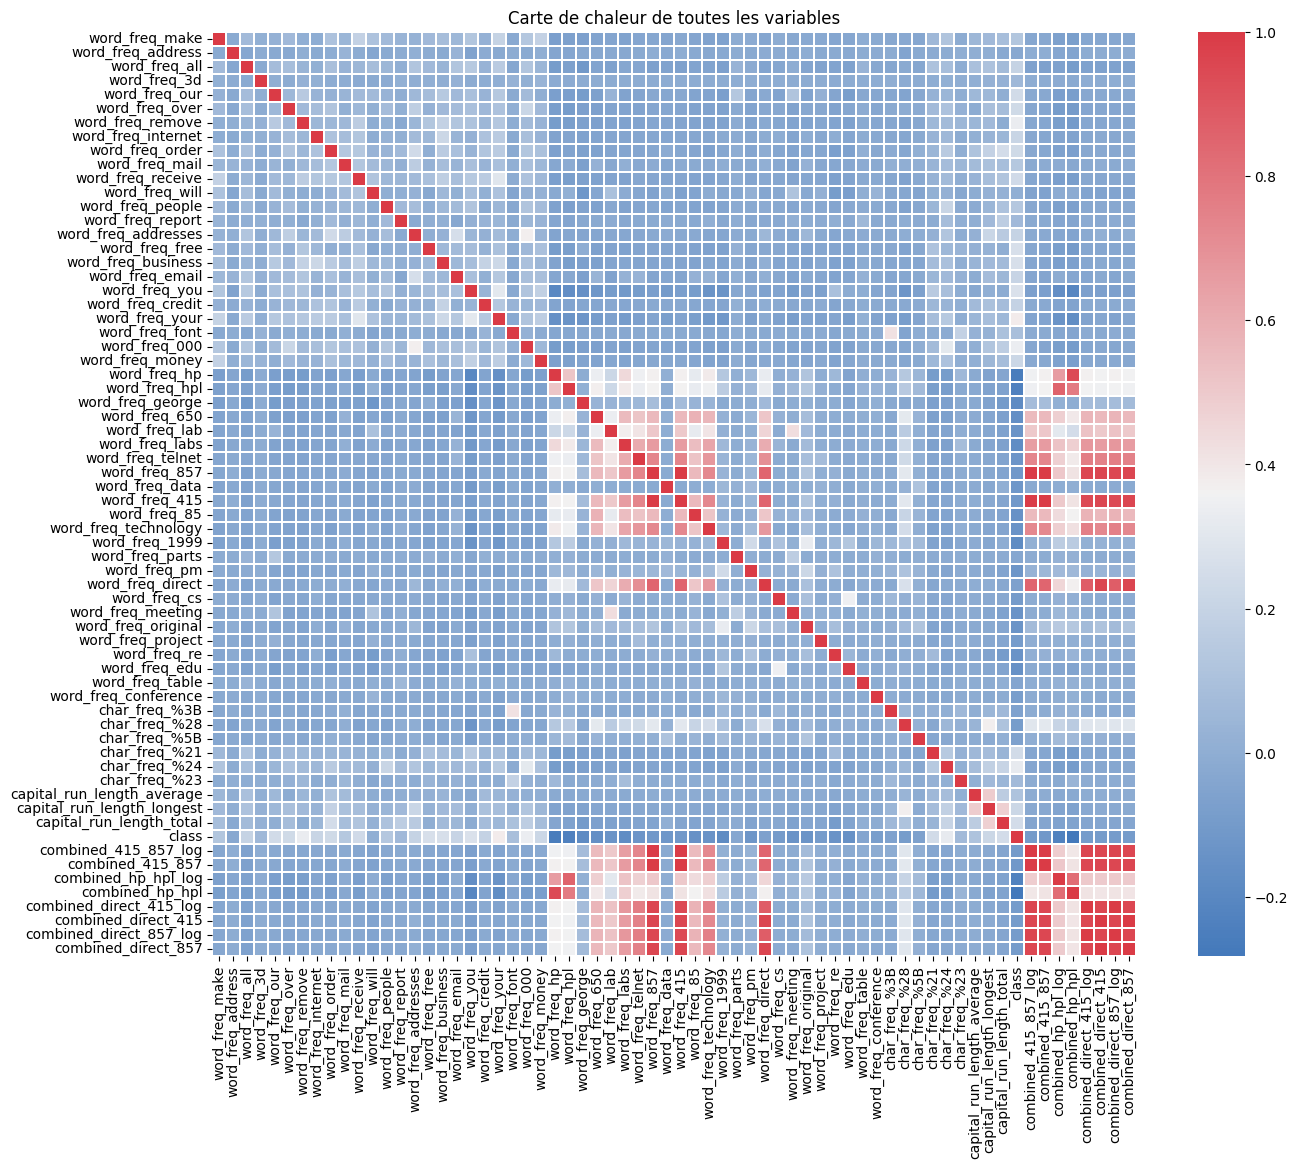

In [23]:
corr=dataset.corr()
plt.figure(figsize=(16, 12))
ax=sns.heatmap(corr,
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            cmap=sns.diverging_palette(250, 10, as_cmap=True),
            square=True,
            linewidths=.1)
ax.set(title="Carte de chaleur de toutes les variables");


3.2 Bucketing
* Y a-t-il des valeurs aberrantes ?

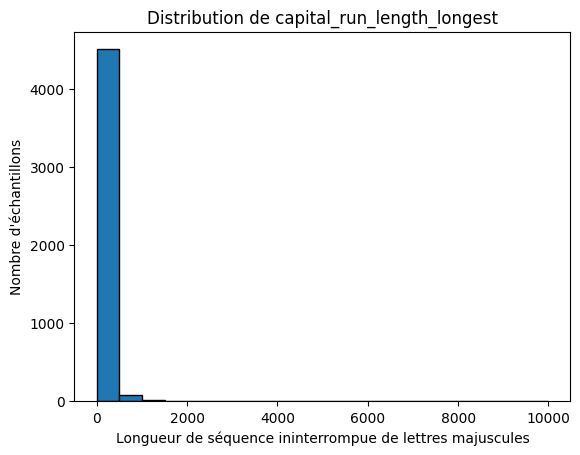

In [24]:
# Histogramme de la variable "capital_run_length_longest"
plt.hist(dataset['capital_run_length_longest'], bins=20, edgecolor='black')
plt.xlabel('Longueur de séquence ininterrompue de lettres majuscules')
plt.ylabel('Nombre d\'échantillons')
plt.title('Distribution de capital_run_length_longest')
plt.show()

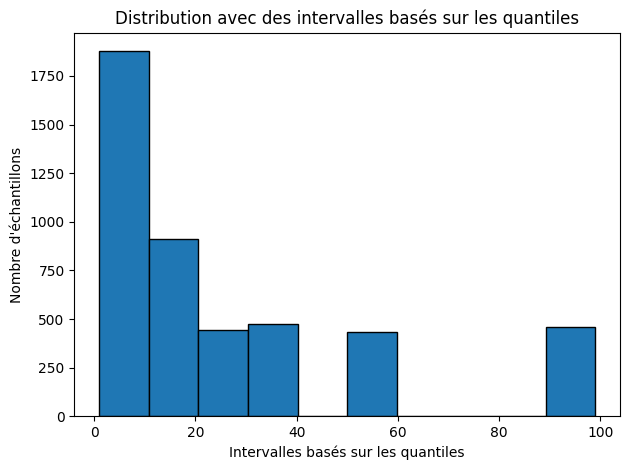

In [25]:
num_bins_quantiles = 10  
data_quantiles_bins = pd.qcut(dataset['capital_run_length_longest'], q=num_bins_quantiles)

data_quantiles_bins_left = data_quantiles_bins.apply(lambda x: x.left)

plt.hist(data_quantiles_bins_left, bins=num_bins_quantiles, edgecolor='black')
plt.xlabel('Intervalles basés sur les quantiles')
plt.ylabel('Nombre d\'échantillons')
plt.title('Distribution avec des intervalles basés sur les quantiles')

plt.tight_layout()
plt.show()

In [26]:
dataset.head(n=10)

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,capital_run_length_total,class,combined_415_857_log,combined_415_857,combined_hp_hpl_log,combined_hp_hpl,combined_direct_415_log,combined_direct_415,combined_direct_857_log,combined_direct_857
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,278,1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,1028,1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,2259,1,0.0,0.0,0.0,0.0,0.0,0.06,0.0,0.06
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,191,1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,191,1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
5,0.00,0.00,0.00,0.0,1.85,0.00,0.00,1.85,0.00,0.00,...,54,1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
6,0.00,0.00,0.00,0.0,1.92,0.00,0.00,0.00,0.00,0.64,...,112,1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
7,0.00,0.00,0.00,0.0,1.88,0.00,0.00,1.88,0.00,0.00,...,49,1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
8,0.15,0.00,0.46,0.0,0.61,0.00,0.30,0.00,0.92,0.76,...,1257,1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00
9,0.06,0.12,0.77,0.0,0.19,0.32,0.38,0.00,0.06,0.00,...,749,1,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00


# **4. Normalisation/Standardisation**

* Existe t-il des variables avec des échelles différentes ?
* Une mise à l'échelle est-elle nécessaire ?

In [27]:
scaler = MinMaxScaler()

dataset['capital_run_length_longest'] = scaler.fit_transform(dataset[['capital_run_length_longest']])

In [28]:
scaler = StandardScaler()

dataset['capital_run_length_longest'] = scaler.fit_transform(dataset[['capital_run_length_longest']])

# **5. Technique SMOTE**

In [29]:
X = dataset.drop(['class'],axis=1)
y = dataset['class']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.85, test_size=0.15, random_state=42)


In [31]:
from sklearn.linear_model import Lasso

alpha = 0.01  # Paramètre de régularisation
lasso_model = Lasso(alpha=alpha)
lasso_model.fit(X_train, y_train)

Lasso(alpha=0.01)

In [32]:
from sklearn.linear_model import Ridge

alpha = 0.01  # Paramètre de régularisation
ridge_model = Ridge(alpha=alpha)
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.01)

In [33]:
smote = SMOTE(sampling_strategy='auto')

# SMOTE uniquement sur l'ensemble d'entraînement
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [34]:
print("Avant l'application de SMOTE :")
print(y_train.value_counts())

Avant l'application de SMOTE :
0    2401
1    1509
Name: class, dtype: int64


In [35]:
print('\nClass distribution after applying SMOTE Technique:',)
print(y_train_resampled.value_counts())


Class distribution after applying SMOTE Technique:
0    2401
1    2401
Name: class, dtype: int64


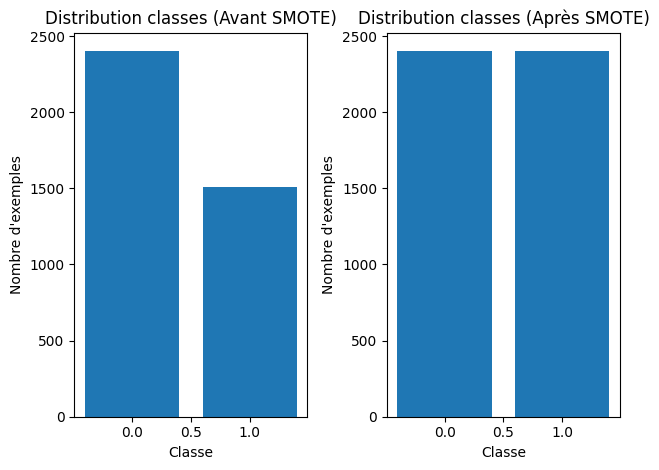

In [36]:
plt.subplot(1, 2, 1)
plt.bar(y_train.value_counts().index, y_train.value_counts().values)
plt.title("Distribution classes (Avant SMOTE)")
plt.xlabel("Classe")
plt.ylabel("Nombre d'exemples")

plt.subplot(1, 2, 2)
plt.bar(pd.Series(y_train_resampled).value_counts().index, pd.Series(y_train_resampled).value_counts().values)
plt.title("Distribution classes (Après SMOTE)")
plt.xlabel("Classe")
plt.ylabel("Nombre d'exemples")

plt.tight_layout()
plt.show()

# **6. Les modèles**

* L'application de la technique SMOTE est-elle efficace sur tous les modèles ?
* La création des nouvelles varaibles ont-elles un impact sur le modèle ?
* Les modèles utilisés sont :
    1. LogisticRegression
    2. DecisionTreeClassifier
    3. KNeighborsClassifier
    4. RandomForestClassifier
    5. GradientBoostingClassifier
    6. XGBClassifier
    7. GaussianNB


In [37]:
def print_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)

    print("Accuracy: {:.2f}".format(accuracy))
    print("Precision: {:.2f}".format(precision))
    print("Recall: {:.2f}".format(recall))
    print("F1-score: {:.2f}".format(f1))
    
def print_cross_validat(cl, X_train, y_train):
    scoring = {
        'accuracy': make_scorer(accuracy_score),
        'precision': make_scorer(precision_score),
        'recall': make_scorer(recall_score),
        'f1': make_scorer(f1_score)
    }
    cv_results = cross_validate(dt_clf, X_train, y_train, cv=5, scoring=scoring)
    print("Cross-Validation Results:")
    print("Accuracy:", cv_results['test_accuracy'].mean())
    print("Precision:", cv_results['test_precision'].mean())
    print("Recall:", cv_results['test_recall'].mean())
    print("F1-score:", cv_results['test_f1'].mean())
    
def evaluate_model(model, X_train, y_train, X_test, y_test, cv=5):
    # Entraîner le modèle et mesurer le temps d'entraînement
    start_time = time.time()
    model.fit(X_train, y_train)
    fitting_time = time.time() - start_time
    
    # Prédire les étiquettes pour les données de test et mesurer le temps de prédiction
    start_time = time.time()
    y_pred = model.predict(X_test)
    scoring_time = time.time() - start_time
    
    # Calculer les métriques de performance
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    auc_roc = roc_auc_score(y_test, y_pred)
    
    # Effectuer la cross-validation et obtenir les scores de performance
    cv_accuracy = cross_val_score(model, X_train, y_train, cv=cv, scoring='accuracy').mean()
    cv_precision = cross_val_score(model, X_train, y_train, cv=cv, scoring='precision').mean()
    cv_recall = cross_val_score(model, X_train, y_train, cv=cv, scoring='recall').mean()
    cv_f1 = cross_val_score(model, X_train, y_train, cv=cv, scoring='f1').mean()
    cv_auc_roc = cross_val_score(model, X_train, y_train, cv=cv, scoring='roc_auc').mean()
    
     # Calculer la courbe ROC
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    
     # Tracer la courbe ROC
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = {:.2f})'.format(roc_auc))
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('Faux Positif')
    plt.ylabel('Vrai Positif')
    plt.title('Receiver Operating Characteristic (ROC)'+model.__class__.__name__)
    plt.legend(loc='lower right')
    plt.show()
    
    results_df = pd.DataFrame({
        'Model': [type(model).__name__],
        'Fitting time': [fitting_time],
        'Scoring time': [scoring_time],
        'Accuracy': [accuracy],
        'Precision': [precision],
        'Recall': [recall],
        'F1-score': [f1],
        'AUC_ROC': [auc_roc],
        'CV Accuracy': [cv_accuracy],
        'CV Precision': [cv_precision],
        'CV Recall': [cv_recall],
        'CV F1-score': [cv_f1],
        'CV AUC_ROC': [cv_auc_roc]
    }, columns=['Model', 'Fitting time', 'Scoring time', 'Accuracy', 'Precision', 'Recall', 'F1-score', 'AUC_ROC', 'CV Accuracy', 'CV Precision', 'CV Recall', 'CV F1-score', 'CV AUC_ROC'])
    
    print(results_df)
    return results_df

**6.1 Logistic Regression**

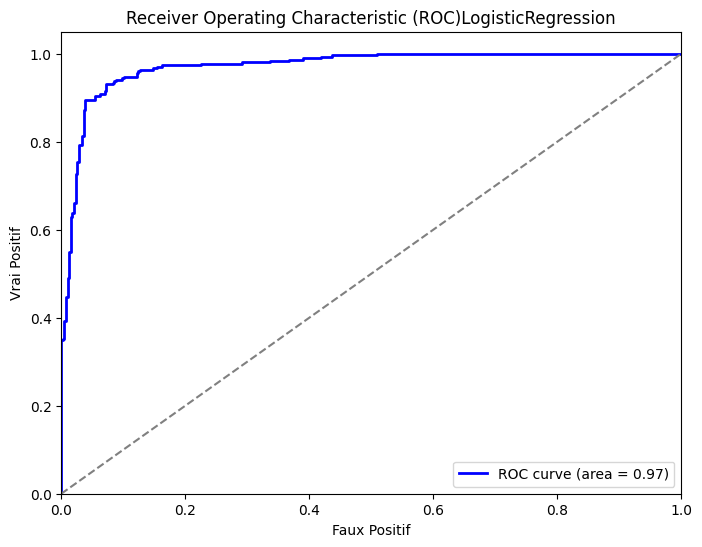

                Model  Fitting time  Scoring time  Accuracy  Precision  \
0  LogisticRegression      0.121466      0.002465  0.927641   0.929054   

     Recall  F1-score   AUC_ROC  CV Accuracy  CV Precision  CV Recall  \
0  0.904605  0.916667  0.925171     0.930865      0.932795   0.928779   

   CV F1-score  CV AUC_ROC  
0     0.930737    0.974092  


In [38]:
spam_clf = LogisticRegression(solver = 'liblinear', max_iter = 10000)
results_df = evaluate_model(spam_clf, X_train_resampled, y_train_resampled, X_test, y_test)


**6.2 Decision Tree Classifier**

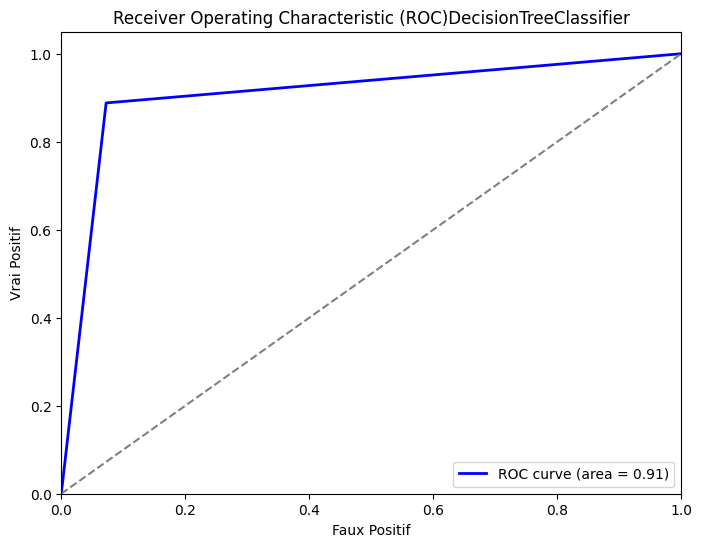

                    Model  Fitting time  Scoring time  Accuracy  Precision  \
0  DecisionTreeClassifier      0.120703       0.00229  0.910275    0.90604   

     Recall  F1-score   AUC_ROC  CV Accuracy  CV Precision  CV Recall  \
0  0.888158   0.89701  0.907903     0.923784      0.920877   0.927111   

   CV F1-score  CV AUC_ROC  
0       0.9239    0.923962  


In [39]:
dt_clf = DecisionTreeClassifier(random_state=42)
results_df = evaluate_model(dt_clf, X_train_resampled, y_train_resampled, X_test, y_test)

**6.3 KNN**

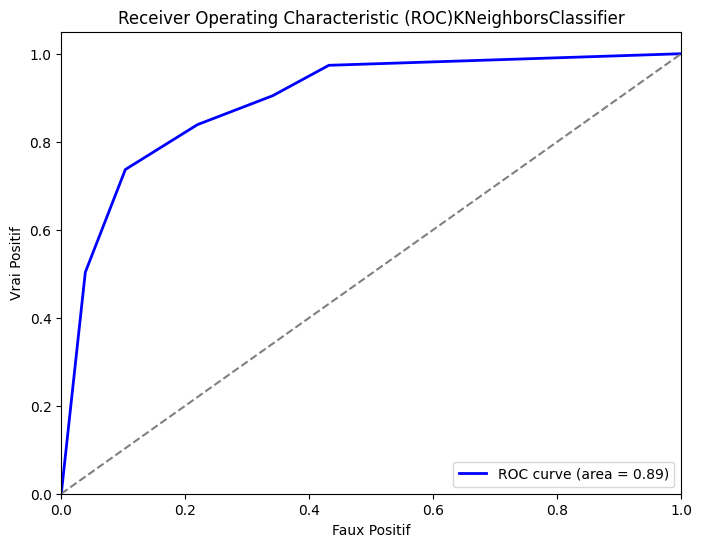

                  Model  Fitting time  Scoring time  Accuracy  Precision  \
0  KNeighborsClassifier      0.005412      0.050838  0.806078       0.75   

     Recall  F1-score   AUC_ROC  CV Accuracy  CV Precision  CV Recall  \
0  0.838816  0.791925  0.809589     0.843404      0.806688   0.903382   

   CV F1-score  CV AUC_ROC  
0     0.852299    0.917132  


In [40]:
knn_clf = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', metric='minkowski', p=2)
results_df = evaluate_model(knn_clf, X_train_resampled, y_train_resampled, X_test, y_test)


**6.4 Random Forest Classifier**

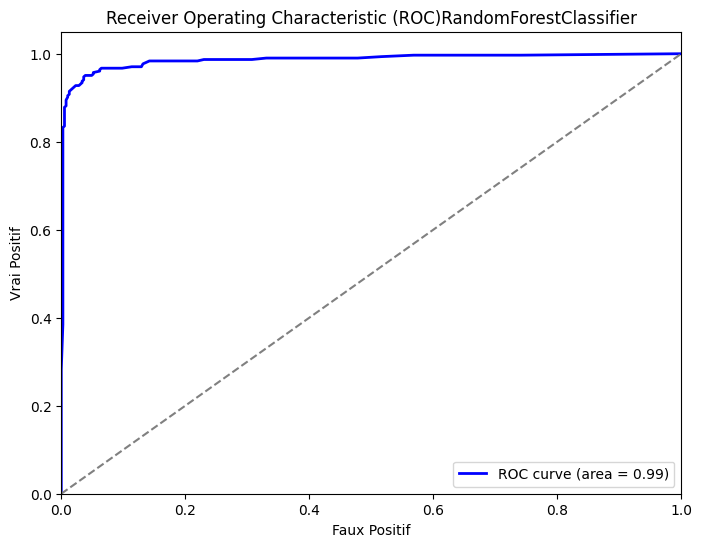

                    Model  Fitting time  Scoring time  Accuracy  Precision  \
0  RandomForestClassifier      0.960661       0.02751  0.955137    0.97561   

     Recall  F1-score   AUC_ROC  CV Accuracy  CV Precision  CV Recall  \
0  0.921053  0.947547  0.951482     0.960228      0.961148   0.959191   

   CV F1-score  CV AUC_ROC  
0     0.960158    0.990455  


In [41]:
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
results_df = evaluate_model(rf_clf, X_train_resampled, y_train_resampled, X_test, y_test)


**6.5 Gradient Boosting**

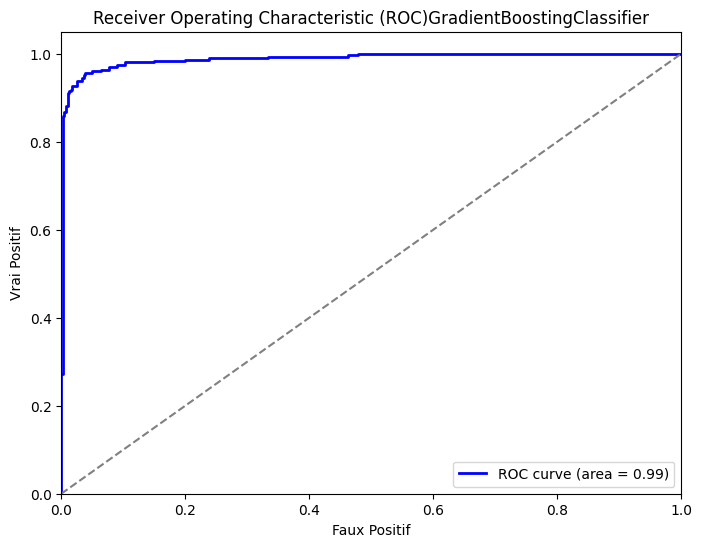

                        Model  Fitting time  Scoring time  Accuracy  \
0  GradientBoostingClassifier      2.596943      0.005059  0.958032   

   Precision    Recall  F1-score   AUC_ROC  CV Accuracy  CV Precision  \
0   0.975779  0.927632  0.951096  0.954772     0.953357      0.957498   

   CV Recall  CV F1-score  CV AUC_ROC  
0   0.948779     0.953104    0.987153  


In [42]:
gb_clf = GradientBoostingClassifier(random_state=42)
results_df_gb = evaluate_model(gb_clf,  X_train_resampled, y_train_resampled, X_test, y_test)

**6.6 Extreme Gradient Boosting Classfier**

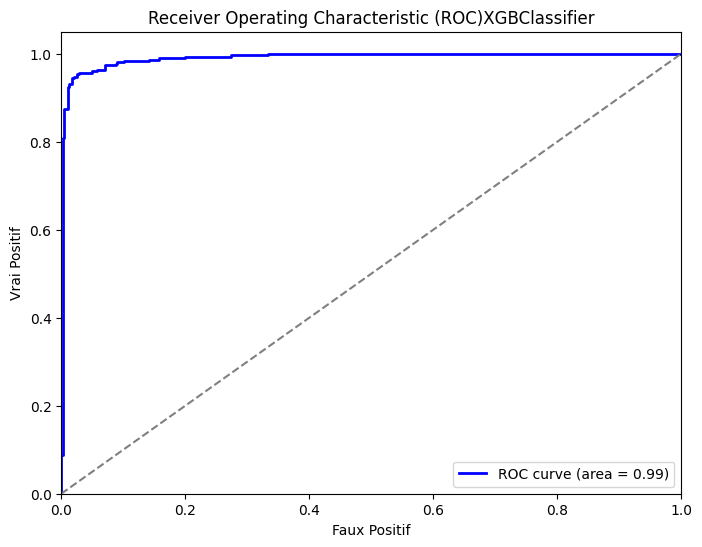

           Model  Fitting time  Scoring time  Accuracy  Precision    Recall  \
0  XGBClassifier       2.00453      0.006881  0.965268   0.972973  0.947368   

   F1-score   AUC_ROC  CV Accuracy  CV Precision  CV Recall  CV F1-score  \
0      0.96  0.963348     0.962728      0.961686   0.963773     0.962707   

   CV AUC_ROC  
0     0.99158  


In [43]:
xgb_clf = XGBClassifier(random_state=42)
results_df_xgb = evaluate_model(xgb_clf, X_train_resampled, y_train_resampled, X_test, y_test)

**6.7 Gaussian NB**

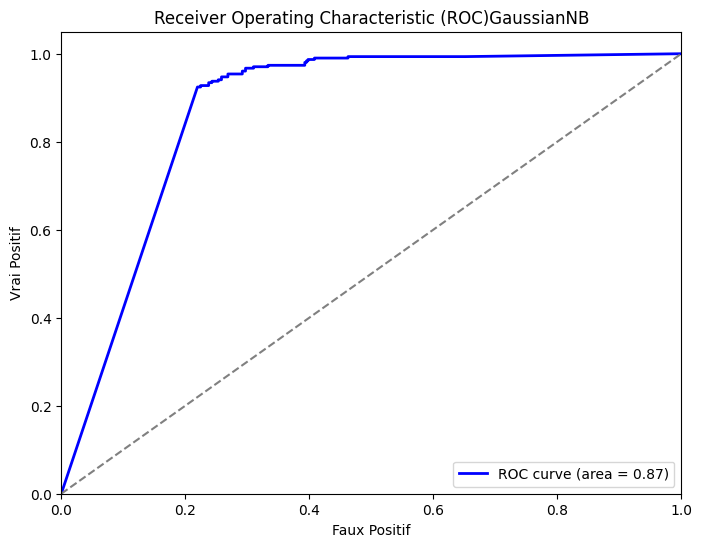

        Model  Fitting time  Scoring time  Accuracy  Precision    Recall  \
0  GaussianNB       0.00909      0.002929  0.827786   0.734177  0.953947   

   F1-score   AUC_ROC  CV Accuracy  CV Precision  CV Recall  CV F1-score  \
0  0.829757  0.841315     0.805371      0.674782   0.960241     0.792257   

   CV AUC_ROC  
0    0.871257  


In [44]:
nb_clf = GaussianNB()
results_df = evaluate_model(nb_clf, X_train, y_train, X_test, y_test)


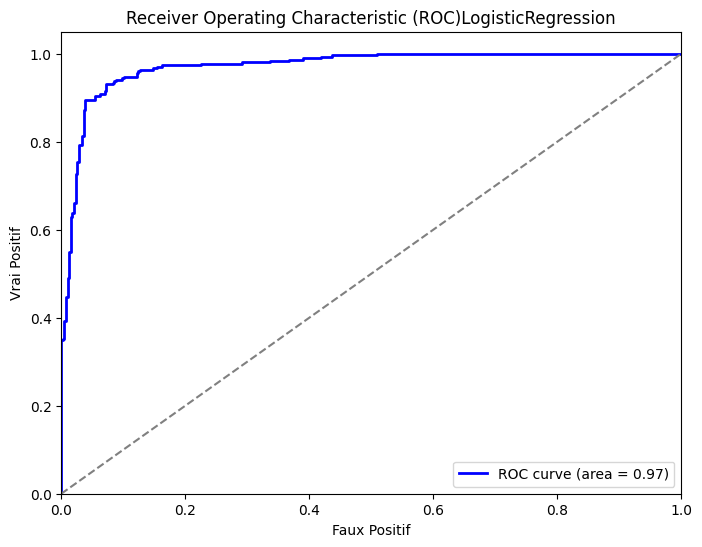

                Model  Fitting time  Scoring time  Accuracy  Precision  \
0  LogisticRegression      0.114494      0.002409  0.927641   0.929054   

     Recall  F1-score   AUC_ROC  CV Accuracy  CV Precision  CV Recall  \
0  0.904605  0.916667  0.925171     0.930865      0.932795   0.928779   

   CV F1-score  CV AUC_ROC  
0     0.930737    0.974092  


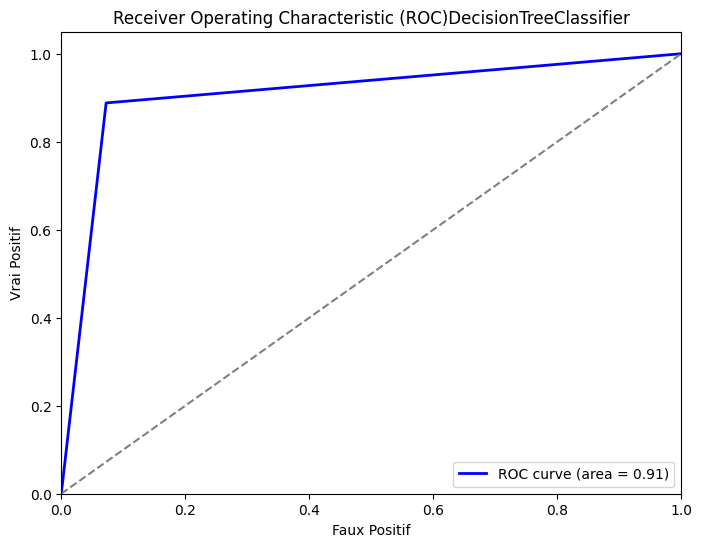

                    Model  Fitting time  Scoring time  Accuracy  Precision  \
0  DecisionTreeClassifier       0.11525      0.002139  0.910275    0.90604   

     Recall  F1-score   AUC_ROC  CV Accuracy  CV Precision  CV Recall  \
0  0.888158   0.89701  0.907903     0.923784      0.920877   0.927111   

   CV F1-score  CV AUC_ROC  
0       0.9239    0.923962  


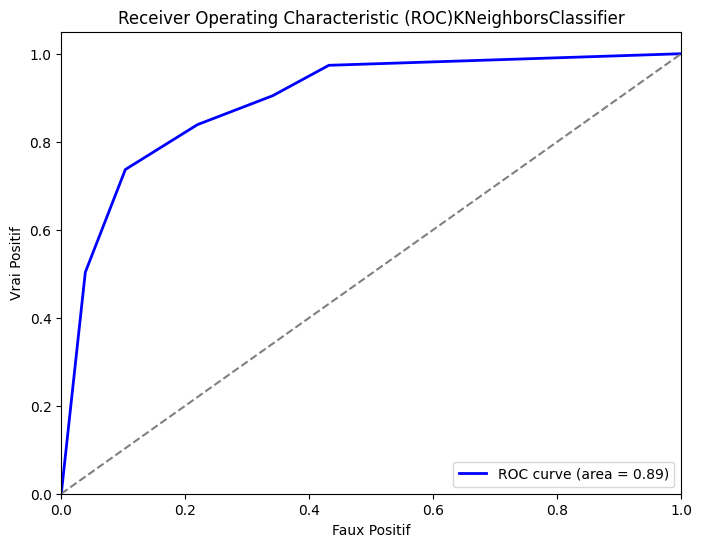

                  Model  Fitting time  Scoring time  Accuracy  Precision  \
0  KNeighborsClassifier      0.006273      0.049756  0.806078       0.75   

     Recall  F1-score   AUC_ROC  CV Accuracy  CV Precision  CV Recall  \
0  0.838816  0.791925  0.809589     0.843404      0.806688   0.903382   

   CV F1-score  CV AUC_ROC  
0     0.852299    0.917132  


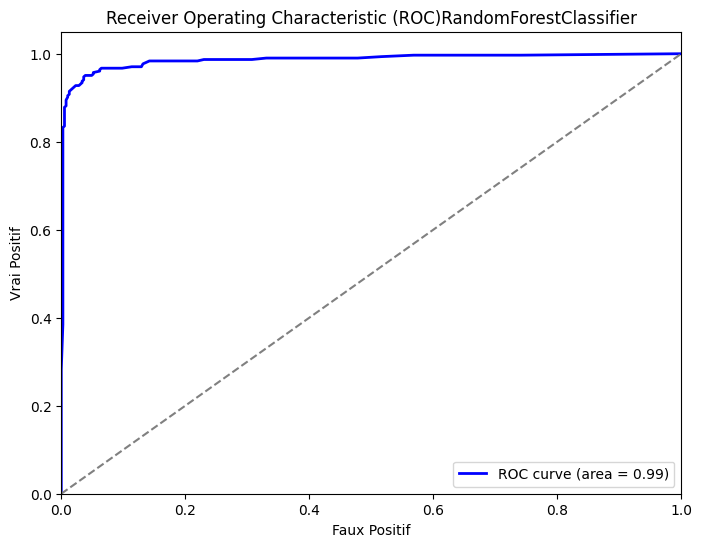

                    Model  Fitting time  Scoring time  Accuracy  Precision  \
0  RandomForestClassifier      1.402286      0.029508  0.955137    0.97561   

     Recall  F1-score   AUC_ROC  CV Accuracy  CV Precision  CV Recall  \
0  0.921053  0.947547  0.951482     0.960228      0.961148   0.959191   

   CV F1-score  CV AUC_ROC  
0     0.960158    0.990455  


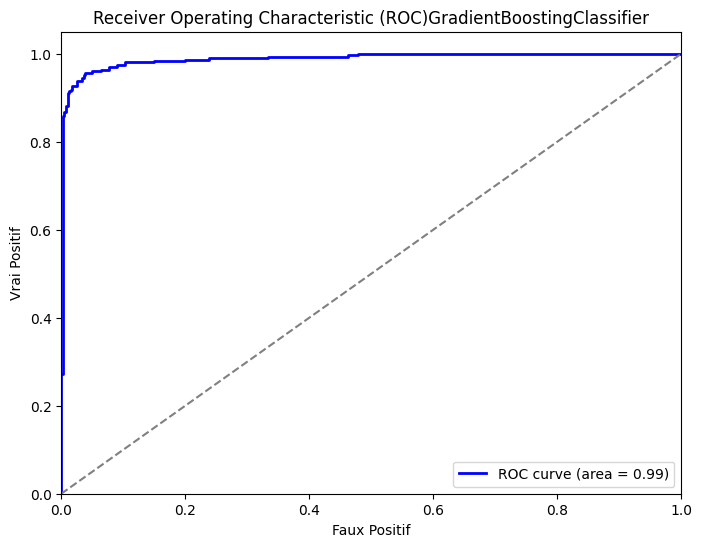

                        Model  Fitting time  Scoring time  Accuracy  \
0  GradientBoostingClassifier      2.238853      0.004025  0.958032   

   Precision    Recall  F1-score   AUC_ROC  CV Accuracy  CV Precision  \
0   0.975779  0.927632  0.951096  0.954772     0.953357      0.957498   

   CV Recall  CV F1-score  CV AUC_ROC  
0   0.948779     0.953104    0.987153  


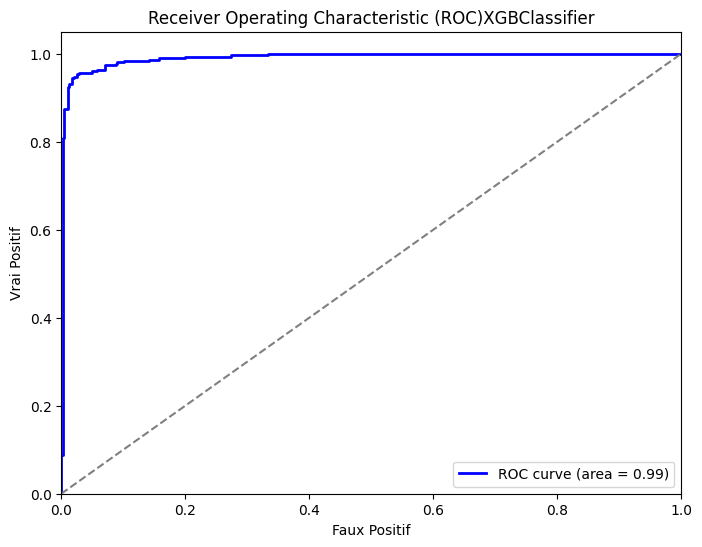

           Model  Fitting time  Scoring time  Accuracy  Precision    Recall  \
0  XGBClassifier       1.92819       0.00732  0.965268   0.972973  0.947368   

   F1-score   AUC_ROC  CV Accuracy  CV Precision  CV Recall  CV F1-score  \
0      0.96  0.963348     0.962728      0.961686   0.963773     0.962707   

   CV AUC_ROC  
0     0.99158  


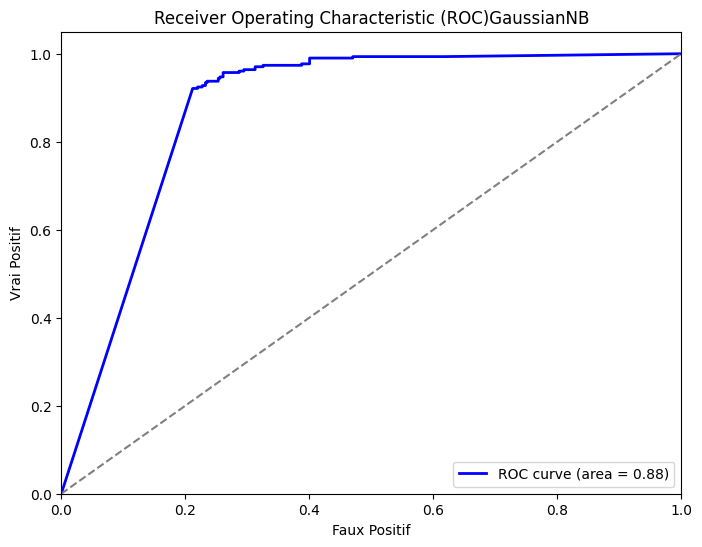

        Model  Fitting time  Scoring time  Accuracy  Precision    Recall  \
0  GaussianNB       0.00864      0.003475   0.83068   0.736709  0.957237   

   F1-score   AUC_ROC  CV Accuracy  CV Precision  CV Recall  CV F1-score  \
0  0.832618  0.844251     0.841322      0.773108   0.966683     0.859083   

   CV AUC_ROC  
0    0.874933  


,Model,Fitting time,Scoring time,Accuracy,Precision,Recall,F1-score,AUC_ROC,CV Accuracy,CV Precision,CV Recall,CV F1-score,CV AUC_ROC
0,LogisticRegression,0.114494,0.002409,0.927641,0.929054,0.904605,0.916667,0.925171,0.930865,0.932795,0.928779,0.930737,0.974092
1,DecisionTreeClassifier,0.115250,0.002139,0.910275,0.906040,0.888158,0.897010,0.907903,0.923784,0.920877,0.927111,0.923900,0.923962
2,KNeighborsClassifier,0.006273,0.049756,0.806078,0.750000,0.838816,0.791925,0.809589,0.843404,0.806688,0.903382,0.852299,0.917132
3,RandomForestClassifier,1.402286,0.029508,0.955137,0.975610,0.921053,0.947547,0.951482,0.960228,0.961148,0.959191,0.960158,0.990455
4,GradientBoostingClassifier,2.238853,0.004025,0.958032,0.975779,0.927632,0.951096,0.954772,0.953357,0.957498,0.948779,0.953104,0.987153
5,XGBClassifier,1.928190,0.007320,0.965268,0.972973,0.947368,0.960000,0.963348,0.962728,0.961686,0.963773,0.962707,0.991580
6,GaussianNB,0.008640,0.003475,0.830680,0.736709,0.957237,0.832618,0.844251,0.841322,0.773108,0.966683,0.859083,0.874933


In [45]:
models = [
    LogisticRegression(solver='liblinear', max_iter=10000),
    DecisionTreeClassifier(random_state=42),
    KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', metric='minkowski', p=2),
    RandomForestClassifier(n_estimators=100, random_state=42),
    GradientBoostingClassifier(random_state=42),
    XGBClassifier(random_state=42),
    GaussianNB()
    # Ajoutez d'autres modèles si nécessaire
]

all_results = []

for model in models:
    model_results = evaluate_model(model, X_train_resampled, y_train_resampled, X_test, y_test)
    all_results.append(model_results)

all_results_df = pd.DataFrame(pd.concat(all_results, ignore_index=True))
all_results_df

# **7. Les hyperparamètres**

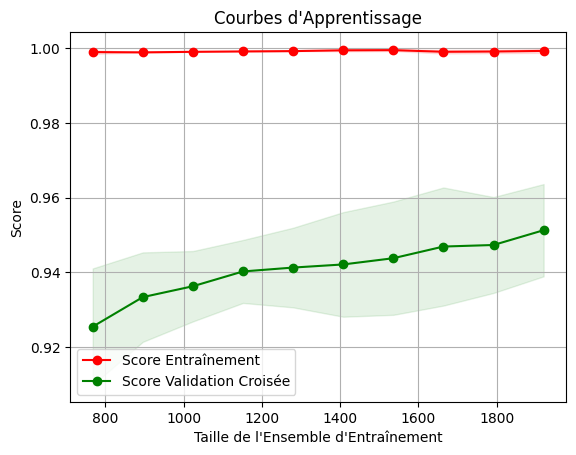

In [46]:
from sklearn.model_selection import learning_curve

model=xgb_clf


# Définissez les tailles d'ensemble d'entraînement que vous souhaitez évaluer
train_sizes = np.linspace(0.2, 0.5, 10)

# Calculez les courbes d'apprentissage
train_sizes, train_scores, test_scores = learning_curve(model, X_train_resampled, y_train_resampled, train_sizes=train_sizes, cv=5)

# Calculez les moyennes et écart-types des scores pour les ensembles d'entraînement et de test
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

# Tracez les courbes d'apprentissage
plt.figure()
plt.title("Courbes d'Apprentissage")
plt.xlabel("Taille de l'Ensemble d'Entraînement")
plt.ylabel("Score")
plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")

plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Score Entraînement")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Score Validation Croisée")

plt.legend(loc="best")
plt.show()

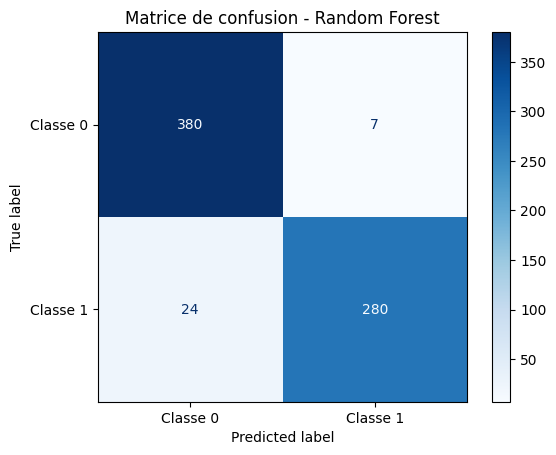

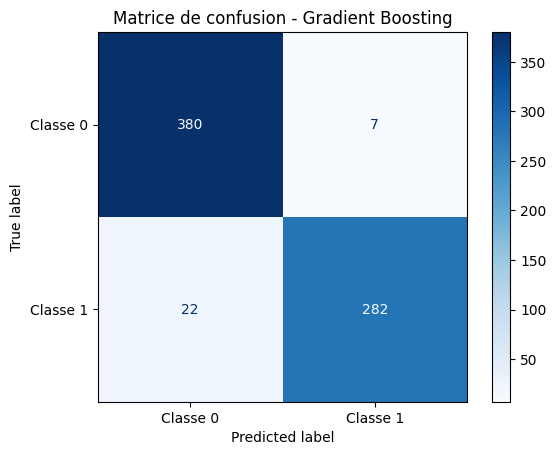

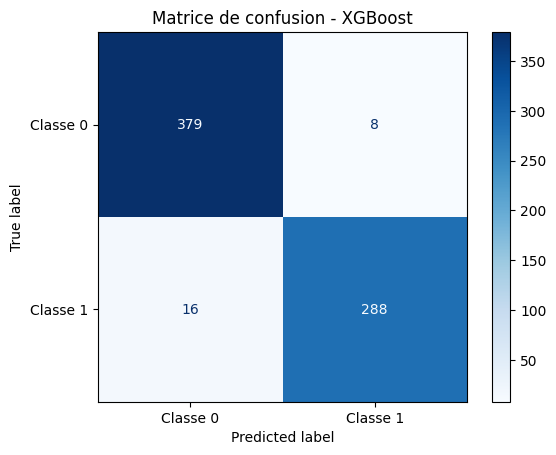

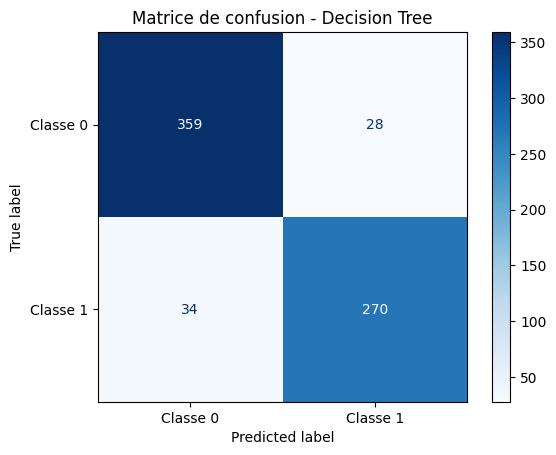

In [47]:
y_pred_rf = rf_clf.predict(X_test)
y_pred_gb = gb_clf.predict(X_test)
y_pred_xgb = xgb_clf.predict(X_test)
y_pred_dt = dt_clf.predict(X_test)

models = [rf_clf, gb_clf, xgb_clf, dt_clf]
model_names = ['Random Forest', 'Gradient Boosting', 'XGBoost', 'Decision Tree']

for model, model_name in zip(models, model_names):
    confusion = confusion_matrix(y_test, model.predict(X_test))
    disp = ConfusionMatrixDisplay(confusion_matrix=confusion, display_labels=['Classe 0', 'Classe 1'])
    disp.plot(cmap=plt.cm.Blues, values_format='d')
    plt.title(f"Matrice de confusion - {model_name}")
    plt.show()

In [48]:
# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 150, 200], 
    'max_depth': [10, 20, 30, 40, 50], 
    'min_samples_split': [2, 4, 6, 8, 10], 
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 4],
}

# Create the RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)

# Create the StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to train the final model
rf_model_optimized = RandomForestClassifier(random_state=42, **best_params)
rf_model_optimized.fit(X_train, y_train)

# Evaluate the final model on the test set
y_pred = rf_model_optimized.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
auc_roc = roc_auc_score(y_test, y_pred)

cv_accuracy = cross_val_score(rf_model_optimized, X_train, y_train, cv=cv, scoring='accuracy').mean()
cv_precision = cross_val_score(rf_model_optimized, X_train, y_train, cv=cv, scoring='precision').mean()
cv_recall = cross_val_score(rf_model_optimized, X_train, y_train, cv=cv, scoring='recall').mean()
cv_f1 = cross_val_score(rf_model_optimized, X_train, y_train, cv=cv, scoring='f1').mean()
cv_auc_roc = cross_val_score(rf_model_optimized, X_train, y_train, cv=cv, scoring='roc_auc').mean()
    

print("Accuracy:", cv_accuracy)
print("Precision:", cv_precision)
print("Recall:", cv_recall)
print("F1-score:", cv_f1)
print("AUC-ROC:", cv_auc_roc)

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Best Hyperparameters: {'max_depth': 40, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Accuracy: 0.9531969309462915
Precision: 0.9523682586834689
Recall: 0.9251171591384129
F1-score: 0.9383848328214626
AUC-ROC: 0.9874672619743272


In [49]:
param_grid = {
    'n_estimators': [50, 100, 150, 200], 
    'max_depth': [10, 20, 30, 40, 50], 
    'min_samples_split': [2, 4, 6, 8, 10], 
    'max_features': ['sqrt'],
    'min_samples_leaf': [1, 2, 4],
}

# Create the GradientBoostingClassifier
gb_model = GradientBoostingClassifier(random_state=42)

# Create the StratifiedKFold for cross-validation
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=gb_model, param_grid=param_grid, cv=cv, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Use the best hyperparameters to train the final model
gb_model_optimized = GradientBoostingClassifier(random_state=42, **best_params)
gb_model_optimized.fit(X_train, y_train)

# Evaluate the final model using cross-validation on the training set
cv_accuracy = cross_val_score(gb_model_optimized, X_train, y_train, cv=cv, scoring='accuracy').mean()
cv_precision = cross_val_score(gb_model_optimized, X_train, y_train, cv=cv, scoring='precision').mean()
cv_recall = cross_val_score(gb_model_optimized, X_train, y_train, cv=cv, scoring='recall').mean()
cv_f1 = cross_val_score(gb_model_optimized, X_train, y_train, cv=cv, scoring='f1').mean()
cv_auc_roc = cross_val_score(gb_model_optimized, X_train, y_train, cv=cv, scoring='roc_auc').mean()

# Print the evaluation metrics
print("CV Accuracy:", cv_accuracy)
print("CV Precision:", cv_precision)
print("CV Recall:", cv_recall)
print("CV F1-score:", cv_f1)
print("CV AUC-ROC:", cv_auc_roc)

Best Hyperparameters: {'max_depth': 10, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 8, 'n_estimators': 200}
CV Accuracy: 0.9593350383631714
CV Precision: 0.9538706746641626
CV Recall: 0.940348947217883
CV F1-score: 0.9469023855664324
CV AUC-ROC: 0.9899325054474831
